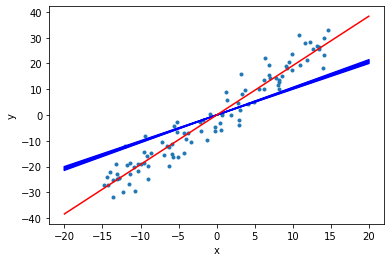

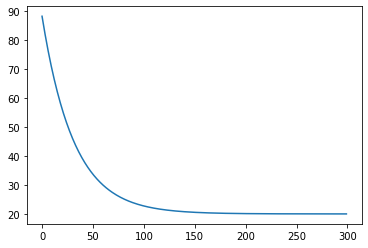

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import torch
np.random.seed(42)

eta = 1e-4 # 学習率
nepochs = 300 # エポック数
m = 100 # データ数

x = np.random.rand(m)*30-15
y = 2*X + np.random.randn(m)*5

x = torch.from_numpy(x)
y = torch.from_numpy(y)
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

def model(x):
    return w*x + b

def mse(p, y):
    return ((p-y)**2).mean()

with torch.no_grad():
    plt.plot([[-20],[20]], [[model(-20)], [model(20)]], "b-")
    
losses = []
for epoch in range(nepochs):
    p = model(x)
    loss = mse(p, y)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * eta
        b -= b.grad * eta
        w.grad.zero_()
        b.grad.zero_()
        if epoch < 5:
            plt.plot([[-20],[20]], [[model(-20)], [model(20)]], "b-")
        elif epoch == nepochs - 1:
            plt.plot([[-20],[20]], [[model(-20)], [model(20)]], "r-")
    losses.append(loss.item())

plt.scatter(x, y, marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(losses)
plt.show()